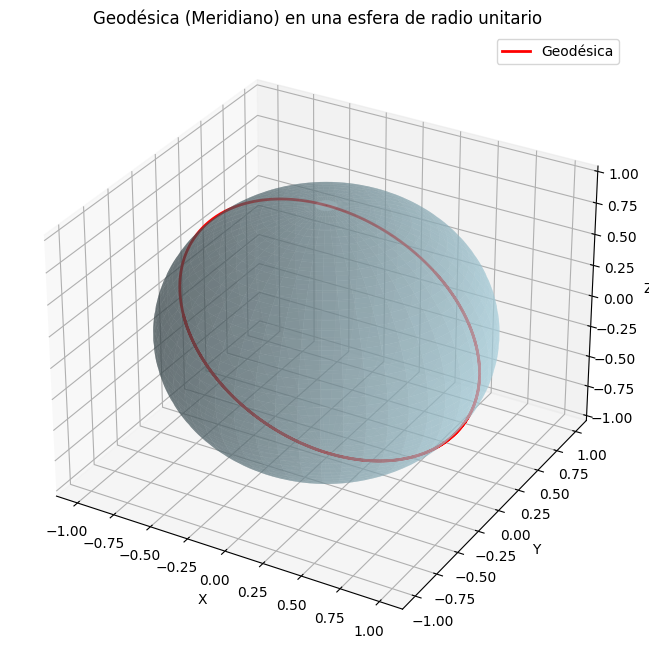

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que define las ecuaciones geodésicas
def geodesic_equations(t, y):
    theta, phi, dtheta, dphi = y
    # La geodésica no tiene cambio en phi, así que dphi=0
    d2theta = np.sin(theta) * np.cos(theta) * dphi**2  # Ecuación de movimiento de theta
    d2phi = 0  # No hay movimiento en la dirección azimutal, por lo tanto dphi=0
    return [dtheta, dphi, d2theta, d2phi]

# Condiciones iniciales para un meridiano (sin movimiento en phi)
theta0 = np.pi / 4  # Colatitud inicial
phi0 = 0            # Longitud inicial (en el polo norte)
dtheta0 = 1.0       # Velocidad inicial en theta (movimiento en la latitud)
dphi0 = 0.0         # Velocidad inicial en phi (sin movimiento en longitud)
y0 = [theta0, phi0, dtheta0, dphi0]

# Resolver las ecuaciones
t_span = (0, 10)  # Intervalo de integración
t_eval = np.linspace(t_span[0], t_span[1], 1000)
solution = solve_ivp(geodesic_equations, t_span, y0, t_eval=t_eval)

# Extraer las soluciones
theta, phi = solution.y[0], solution.y[1]

# Convertir a coordenadas cartesianas para visualizar en la esfera
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Graficar la esfera y la geodésica
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la esfera
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
xs = np.outer(np.sin(v), np.cos(u))
ys = np.outer(np.sin(v), np.sin(u))
zs = np.outer(np.cos(v), np.ones_like(u))
ax.plot_surface(xs, ys, zs, color='lightblue', alpha=0.5)

# Dibujar la geodésica (meridiano)
ax.plot(x, y, z, color='red', linewidth=2, label='Geodésica')

# Configuración del gráfico
ax.set_title("Geodésica (Meridiano) en una esfera de radio unitario")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()
